In [1]:
import pandas as pd
import numpy as np
import sklearn
import wfdb
import pywt
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [38]:
import os
data_dict = {}
for file in os.listdir("/Users/cesargenatios/Downloads/ptb-diagnostic-ecg-database-1.0.0"):
    if 'patient' in file:
        # print(file)
        ecg_records_list = []
        for ecg_recording in os.listdir("/Users/cesargenatios/Downloads/ptb-diagnostic-ecg-database-1.0.0/" + file):
            ecg_recording = ecg_recording.split('.')[0]
            ecg_records_list.append(ecg_recording)
            ecg_records_list = list(set(ecg_records_list))

        print(ecg_records_list)
        for record in ecg_records_list:
            record_data = wfdb.rdrecord("/Users/cesargenatios/Downloads/ptb-diagnostic-ecg-database-1.0.0/" + file + '/' + record)
            #print(record.__dict__)
            data_dict.update({file+'_'+record: record_data})
print(data_dict.keys)

#record = wfdb.rdrecord("/Users/cesargenatios/Downloads/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re")

# for ecg_recording in os.listdir("/Users/cesargenatios/Downloads/ptb-diagnostic-ecg-database-1.0.0/patient001"):
#     print(ecg_recording)

patient227
['s0450_re']
patient015
['s0057lre', 's0047lre', 's0152lre']
patient218
['s0440_re']
patient012
['s0043lre', 's0050lre']
patient220
['s0442_re']
patient024
['s0094lre', 's0084lre', 's0083lre', 's0086lre']
patient216
['s0438_re']
patient229
['s0453_re', 's0452_re']
patient211
['s0433_re']
patient023
['s0085lre', 's0081lre', 's0103lre', 's0080lre']
patient048
['s0180lre', 's0172lre', 's0171lre', 's0277lre']
patient083
['s0290lre', 's0286lre', 's0272lre', 's0268lre']
patient077
['s0254lre', 's0285lre', 's0251lre', 's0258lre']
patient245
['s0474_re', 's0480_re']
patient289
['s0550_re']
patient242
['s0471_re']
patient070
['s0235lre']
patient084
['s0313lre', 's0281lre', 's0289lre', 's0288lre']
patient079
['s0257lre', 's0256lre', 's0269lre', 's0263lre']
patient274
['s0512_re']
patient046
['s0156lre', 's0168lre', 's0161lre', 's0184lre']
patient280
['s0535_re']
patient287
['s0547_re', 's0548_re']
patient041
['s0138lre', 's0136lre', 's0132lre', 's0276lre']
patient273
['s0511_re']
pati

In [3]:
print(record.__dict__)

{'record_name': 's0010_re', 'n_sig': 15, 'fs': 1000, 'counter_freq': None, 'base_counter': None, 'sig_len': 38400, 'base_time': None, 'base_date': None, 'comments': ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at rest): n/a'

In [4]:
#print(record.__dict__['comments'])
all_data = pd.DataFrame()
for key, value in data_dict.items():
    for string in value.__dict__['comments']:
        if 'Reason for admission' in string:
            label  = string.split(":")[1]
    
    columns = value.__dict__['sig_name']
    signals = value.__dict__['p_signal']
    data = pd.DataFrame(signals, columns=columns)
    data['label'] = label
    data['patient_id'] = key
    all_data = all_data.append(data)

all_data.head()
# for string in record.__dict__['comments']:
#     if 'Reason for admission' in string:
#         label  = string.split(":")[1]
# print(label)

 Myocardial infarction


In [5]:
# print(dir(record))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adjust_datetime', '_arrange_fields', 'adc', 'adc_gain', 'adc_res', 'adc_zero', 'base_counter', 'base_date', 'base_time', 'baseline', 'block_size', 'byte_offset', 'calc_adc_params', 'calc_checksum', 'check_field', 'check_field_cohesion', 'check_read_inputs', 'check_sig_cohesion', 'checksum', 'comments', 'convert_dtype', 'counter_freq', 'd_signal', 'dac', 'e_d_signal', 'e_p_signal', 'file_name', 'fmt', 'fs', 'get_write_fields', 'get_write_subset', 'init_value', 'n_sig', 'p_signal', 'record_name', 'samps_per_frame', 'set_d_features', 'set_default', 'set_defaults', 'set_p_features', 'sig_len', 'sig_name', 'skew', 'smooth_frames', 'units', 'wr_dat_fi

In [6]:
# columns = record.__dict__['sig_name']
# signals = record.__dict__['p_signal']
# data = pd.DataFrame(signals, columns=columns)
# data['label'] = label
# data.head()

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6,vx,vy,vz,label
0,-0.2445,-0.2290,0.0155,0.2370,-0.1300,-0.1070,-0.0440,-0.1205,-0.0560,0.1060,0.1965,0.1950,-0.0015,0.0600,-0.0090,Myocardial infarction
1,-0.2425,-0.2335,0.0090,0.2380,-0.1255,-0.1125,-0.0420,-0.1175,-0.0510,0.1095,0.2020,0.1980,-0.0015,0.0610,-0.0100,Myocardial infarction
2,-0.2415,-0.2345,0.0070,0.2380,-0.1240,-0.1140,-0.0440,-0.1180,-0.0535,0.1095,0.2005,0.1965,-0.0035,0.0555,-0.0085,Myocardial infarction
3,-0.2410,-0.2290,0.0120,0.2350,-0.1260,-0.1090,-0.0450,-0.1175,-0.0515,0.1115,0.2010,0.1970,-0.0020,0.0535,-0.0080,Myocardial infarction
4,-0.2315,-0.2270,0.0045,0.2295,-0.1180,-0.1115,-0.0455,-0.1170,-0.0495,0.1115,0.2000,0.1985,0.0005,0.0545,-0.0085,Myocardial infarction


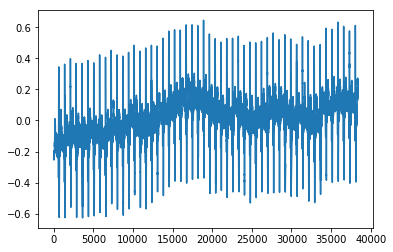

[-0.33034226 -0.31799497 -0.334155   ...  0.20989355  0.20362312
  0.18547884]


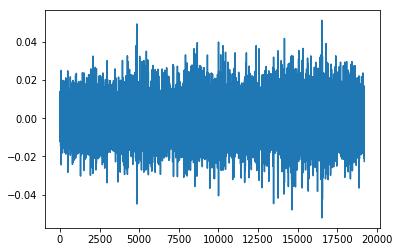

[305, 607, 908, 1210, 1518, 1821, 2125, 2444, 2746, 3050, 3354, 3658, 3959, 4262, 4565, 4871, 5174, 5481, 5782, 6094, 6395, 6658, 6944, 7251, 7564, 7883, 8205, 8509, 8829, 9140, 9456, 9759, 10062, 10392, 10694, 11002, 11307, 11621, 11926, 12317, 12620, 12922, 13320, 13668, 13972, 14275, 14581, 14888, 15278, 15589, 15938, 16247, 16549, 16867, 17169, 17477, 17791, 18120, 18424, 18850]
dict_keys([305, 607, 908, 1210, 1518, 1821, 2125, 2444, 2746, 3050, 3354, 3658, 3959, 4262, 4565, 4871, 5174, 5481, 5782, 6094, 6395, 6658, 6944, 7251, 7564, 7883, 8205, 8509, 8829, 9140, 9456, 9759, 10062, 10392, 10694, 11002, 11307, 11621, 11926, 12317, 12620, 12922, 13320, 13668, 13972, 14275, 14581, 14888, 15278, 15589, 15938, 16247, 16549, 16867, 17169, 17477, 17791, 18120, 18424, 18850])


In [7]:
# Preprocessing
# Sample to 1000Hz
# db 6 filter
for col in data.columns:
    if col != 'vx' or col != 'vy' or col != 'vz' or col != 'label'
        signal = data[col].to_numpy()
        plt.plot(signal)
        plt.show()
        # Returns tuple of approximation, detailed coefficients. We only care about the coeff
        approx, coeff = pywt.dwt(signal, 'db6')
        print(approx)
        plt.plot(coeff)
        plt.show()
        # R peak using pan-tompkins
        from ecgdetectors import Detectors
        detectors = Detectors(1000)
        r_peaks = detectors.pan_tompkins_detector(coeff)
        print(r_peaks)
        # select 250 left of R and 500 right of R as one beat
        cleaned_signal_dict = {}
        for peak in r_peaks:
            cleaned_signal_dict.update({peak: coeff[peak-250:peak+500]})
        #print(cleaned_signal_dict.values())
        # DWT on each beat to 4th power
        dwt_signal_1_approx = {}
        dwt_signal_1_coeff = {}
        dwt_signal_2_approx = {}
        dwt_signal_2_coeff = {}
        dwt_signal_3_approx = {}
        dwt_signal_3_coeff = {}
        dwt_signal_4_approx = {}
        dwt_signal_4_coeff = {}

        for i in range(1,5):
            if i == 1: 
                tmp_signal_dict = cleaned_signal_dict
                write_signal_dict_approx = dwt_signal_1_approx
                write_signal_dict_coeff = dwt_signal_1_coeff
            elif i == 2: 
                tmp_signal_dict = dwt_signal_1_coeff
                write_signal_dict_approx = dwt_signal_2_approx
                write_signal_dict_coeff = dwt_signal_2_coeff
            elif i == 3: 
                tmp_signal_dict = dwt_signal_2_coeff
                write_signal_dict_approx = dwt_signal_3_approx
                write_signal_dict_coeff = dwt_signal_3_coeff
            elif i == 4: 
                tmp_signal_dict = dwt_signal_3_coeff
                write_signal_dict_approx = dwt_signal_4_approx
                write_signal_dict_coeff = dwt_signal_4_coeff
            for key, value in tmp_signal_dict.items():
                approx, coeff = pywt.dwt(value, 'db6')
                write_signal_dict_approx.update({key: approx})
                write_signal_dict_coeff.update({key: coeff})



In [8]:
# Feature extraction on each of the 4 dictionaries 
# - Approximate Entropy
# - Signal Energy
# - Fuzzy Entropy
# - Kolmogorov-SInai Entropy
# - Permutation Entropy
# - Shannon Entropy
# - Renyi Entropy
# - Tsallis Entropy
# - Wavelet Entropy
# - Fractal Dimension
# - Kolmogorov Complexity
# - Largest Lyapuniv Exponent
import antropy as ant
from scipy.stats import entropy
from scipy.special import kolmogorov
import neurokit2 as nk
from scipy.stats import kstest
import nolds
from pybdm import BDM
import math

def renyi_entropy(x, alpha):
    return (1.0 / (1.0 - alpha)) * np.log2(np.sum(x ** alpha))

def wavelet_entropy(x):
    return (-sum((x)*np.log(x)))

def tsallis_entropy(x, q=2):
    return (1-sum(x))/(q-1)

approximate_entropy = []
signal_energy = []
fuzzy_entropy = []
kolmogorov_entropy = []
permutation_entropy = []
shannon_entropy = []
renyi_entropy_list = []
tsallis_entropy_list = []
wavelet_entropy_list = []
fractal_dimension = []
kolmogorov_complexity = []
largest_lyapuniv_exponent = []

for i in range(1,5):
    if i == 1: 
        write_signal_dict_approx = dwt_signal_1_approx
        write_signal_dict_coeff = dwt_signal_1_coeff
    elif i == 2: 
        write_signal_dict_approx = dwt_signal_2_approx
        write_signal_dict_coeff = dwt_signal_2_coeff
    elif i == 3: 
        write_signal_dict_approx = dwt_signal_3_approx
        write_signal_dict_coeff = dwt_signal_3_coeff
    elif i == 4: 
        write_signal_dict_approx = dwt_signal_4_approx
        write_signal_dict_coeff = dwt_signal_4_coeff
    for key in write_signal_dict_approx.keys():

        # APPROXIMATE ENTROPY
        print("Calculating Entropy")
        approximate_entropy.append(ant.app_entropy(write_signal_dict_approx[key]))
        approximate_entropy.append(ant.app_entropy(write_signal_dict_coeff[key]))

        # SIGNAL ENERGY
        print("Calculating Signal Energy")
        signal_energy.append(np.sum(write_signal_dict_approx[key]))
        signal_energy.append(np.sum(write_signal_dict_coeff[key]))

        # FUZZY ENTROPY
        print("Calculating Fuzzy Entropy")
        fuzzy_entropy.append(nk.entropy_fuzzy(write_signal_dict_approx[key]))
        fuzzy_entropy.append(nk.entropy_fuzzy(write_signal_dict_coeff[key]))

        # KOLMOGOROV ENTROPY
        print("Calculating Kolmogorov Entropy")
        kolmogorov_entropy.append(np.mean(kolmogorov(write_signal_dict_approx[key])))
        kolmogorov_entropy.append(np.mean(kolmogorov(write_signal_dict_coeff[key])))

        # PERMUTATION ENTROPY
        print("Calculating Permutation Entropy")
        permutation_entropy.append(ant.perm_entropy(write_signal_dict_approx[key], normalize=True))
        permutation_entropy.append(ant.perm_entropy(write_signal_dict_coeff[key], normalize=True))

        # SHANNON ENTROPY
        print("Calculating Shannon Entropy")
        tmp_series_approx = write_signal_dict_approx[key]
        tmp_series_coeff = write_signal_dict_coeff[key]
        pd_series_approx = pd.Series(tmp_series_approx)
        counts_approx = pd_series_approx.value_counts()
        shannon_entropy.append(entropy(counts_approx))
        pd_series_coeff = pd.Series(tmp_series_coeff)
        counts_coeff = pd_series_coeff.value_counts()
        shannon_entropy.append(entropy(counts_coeff))

        # RENYI ENTROPY
        print("Calculating Renyi Entropy")
        renyi_entropy_list.append(renyi_entropy(write_signal_dict_approx[key], 2))
        renyi_entropy_list.append(renyi_entropy(write_signal_dict_coeff[key], 2))

        # TSALLIS ENTROPY
        print("Calcuating Tsallis Entropy")
        tsallis_entropy_list.append(tsallis_entropy(write_signal_dict_approx[key]))
        tsallis_entropy_list.append(tsallis_entropy(write_signal_dict_coeff[key]))

        # WAVELET ENTROPY
        print("Calculating Wavelet Entropy")
        wavelet_entropy_list.append(wavelet_entropy(write_signal_dict_approx[key]))
        wavelet_entropy_list.append(wavelet_entropy(write_signal_dict_coeff[key]))

        # FRACTAL DIMENSION
        print("Fractal Dimension Entropy")
        fractal_dimension.append(ant.petrosian_fd(write_signal_dict_approx[key]))
        fractal_dimension.append(ant.petrosian_fd(write_signal_dict_coeff[key]))

        # KOLMOGOROV COMPLEXITY
        # BDM is an approximation for Kolmogorov complexity
        bdm = BDM(ndim=1)
        int_dict_approx = write_signal_dict_approx[key]
        int_dict_coeff = write_signal_dict_coeff[key]
        for i in range(len(int_dict_approx)):
            int_dict_approx[i] = math.floor((max(int_dict_approx) - int_dict_approx[i])/(max(int_dict_approx)-min(int_dict_approx)))
            int_dict_coeff[i] = math.floor((max(int_dict_coeff) - int_dict_coeff[i])/(max(int_dict_coeff)-min(int_dict_coeff)))
        
        int_dict_approx = int_dict_approx.astype(int)
        int_dict_coeff = int_dict_coeff.astype(int)
        kolmogorov_complexity.append(bdm.bdm(int_dict_approx))
        kolmogorov_complexity.append(bdm.bdm(int_dict_coeff))

        # LARGEST LYAPUNIV EXPONENT
        largest_lyapuniv_exponent.append(nolds.lyap_r(write_signal_dict_approx[key], emb_dim=2, trajectory_len=5))
        largest_lyapuniv_exponent.append(nolds.lyap_r(write_signal_dict_coeff[key], emb_dim=2, trajectory_len=5))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
/anac

In [10]:
data = pd.DataFrame()
data['approximate_entropy'] = approximate_entropy
data['signal_energy'] = signal_energy
data['fuzzy_entropy'] = fuzzy_entropy
data['kolmogorov_entropy'] = kolmogorov_entropy
data['permutation_entropy'] = permutation_entropy
data['shannon_entropy'] = shannon_entropy
data['renyi_entropy'] = renyi_entropy_list
data['tsallis_entropy'] = tsallis_entropy_list
data['wavelet_entropy'] = wavelet_entropy_list
data['fractal_dimension'] = fractal_dimension
data['kolmogorov_complexity'] = kolmogorov_complexity
data['largest_lyapuniv_exponent'] = largest_lyapuniv_exponent
data['label'] = 'Myocardial_Infarction'
data = data.fillna(0)
data.head()

,approximate_entropy,signal_energy,fuzzy_entropy,kolmogorov_entropy,permutation_entropy,shannon_entropy,renyi_entropy,tsallis_entropy,wavelet_entropy,fractal_dimension,kolmogorov_complexity,largest_lyapuniv_exponent,label
0,1.223988,-0.001699,1.703041,1.0,0.993865,5.940171,7.265947,1.001699,0.0,1.045013,30.564610,0.000000,Myocardial_Infarction
1,1.204751,-0.211339,1.569452,1.0,0.986380,5.940171,4.918949,1.211339,0.0,1.040177,114.343025,0.007998,Myocardial_Infarction
2,1.229976,0.003210,1.634317,1.0,0.989901,5.940171,6.960464,0.996790,0.0,1.046059,86.405437,0.000000,Myocardial_Infarction
3,1.179644,0.047118,1.585199,1.0,0.995231,5.940171,4.857143,0.952882,0.0,1.039108,114.831208,0.000000,Myocardial_Infarction
4,1.185806,0.021197,1.634121,1.0,0.995540,5.940171,7.005747,0.978803,0.0,1.044413,173.510604,0.000000,Myocardial_Infarction


In [12]:
def get_label(label):
    if label == 'Myocardial_Infarction':
        return 1
    else:
        return 0

data['label'] = data['label'].apply(get_label)
data.head()


,approximate_entropy,signal_energy,fuzzy_entropy,kolmogorov_entropy,permutation_entropy,shannon_entropy,renyi_entropy,tsallis_entropy,wavelet_entropy,fractal_dimension,kolmogorov_complexity,largest_lyapuniv_exponent,label
0,1.223988,-0.001699,1.703041,1.0,0.993865,5.940171,7.265947,1.001699,0.0,1.045013,30.564610,0.000000,1
1,1.204751,-0.211339,1.569452,1.0,0.986380,5.940171,4.918949,1.211339,0.0,1.040177,114.343025,0.007998,1
2,1.229976,0.003210,1.634317,1.0,0.989901,5.940171,6.960464,0.996790,0.0,1.046059,86.405437,0.000000,1
3,1.179644,0.047118,1.585199,1.0,0.995231,5.940171,4.857143,0.952882,0.0,1.039108,114.831208,0.000000,1
4,1.185806,0.021197,1.634121,1.0,0.995540,5.940171,7.005747,0.978803,0.0,1.044413,173.510604,0.000000,1


In [20]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = data['label']
x = data.drop(columns=['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled, x_test_scaled, y_train, y_test)



[[0.68914619 0.45187849 0.32544863 ... 0.3385349  0.5968259  0.12005028]
 [0.6545787  0.30832651 0.56957776 ... 0.28056428 0.43292709 0.12005028]
 [0.12256417 0.360179   0.80465846 ... 0.73560343 0.4302639  0.12005028]
 ...
 [0.32493388 0.49779396 0.63969647 ... 0.52370808 0.7153499  0.11638383]
 [0.15901955 0.54095231 0.85028752 ... 0.60184365 0.13525172 0.12005028]
 [0.92891771 0.4422418  0.43744462 ... 0.25762506 0.73571948 0.12005028]] [[0.93845902 0.45949798 0.36704712 ... 0.07507958 0.01500379 1.        ]
 [0.12569371 0.46632482 0.53802069 ... 0.60184365 0.13968034 0.23444375]
 [0.21128944 0.60490135 0.56664386 ... 0.60184365 0.         0.12005028]
 ...
 [0.18032327 0.47115712 0.68888547 ... 0.60184365 0.15015162 0.12005028]
 [0.93323249 0.02747151 0.35709467 ... 0.14946387 0.45791989 0.12005028]
 [0.15589    0.47630527 0.54565262 ... 0.77995494 0.28939966 0.2813744 ]] 132    1
228    1
473    1
42     1
360    1
406    1
140    1
457    1
209    1
192    1
448    1
22     1
422 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [23]:
import sklearn.metrics
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
print("Accuracy: {accuracy}, Precision: {precision}, Recall:{recall}".format(accuracy=accuracy, precision=precision, recall=recall))

Accuracy: 1.0, Precision: 1.0, Recall:1.0
